# Real estate research

**The purpose of the study** is to examine the data presented and determine the parameters that influence the market value of real estate objects. It will also be interesting to look at how quickly an apartment can be sold and in which localities the most listings are placed. 

**The course of actions:**

The data is an archive of ads for apartments for sale in St. Petersburg and neighboring settlements for several years. Two types of data are available for each apartment for sale. The first one is entered by the user, the second one is obtained automatically on the basis of map data.

Since nothing is known about the quality of the data, a review of the data will be required first. If any problems are identified that could prevent further qualitative analysis of the data, they will need to be corrected. Thus, the progress of the study can be divided into the following steps:

1. Data review
2. Data preprocessing
3. Exploratory data analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# data loading
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.shape

(23699, 22)

There are 23699 rows and 22 columns in the dataframe.

In [3]:
data.sample(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21162,9,4950000.0,38.5,2017-07-02T00:00:00,1,NaN,11.0,16.7,9,NaN,...,9.3,NaN,Санкт-Петербург,50996.0,15828.0,0.0,NaN,0.0,NaN,310.0
22374,14,2700000.0,67.4,2018-02-16T00:00:00,3,2.60,10.0,38.2,8,NaN,...,10.6,5.0,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,45.0
18815,8,5700000.0,76.0,2018-11-19T00:00:00,3,3.15,4.0,49.3,4,NaN,...,11.5,NaN,Санкт-Петербург,20631.0,6202.0,1.0,553.0,2.0,473.0,150.0
5135,11,23500000.0,110.0,2017-03-09T00:00:00,2,3.10,8.0,32.0,6,NaN,...,50.0,2.0,Санкт-Петербург,26502.0,5204.0,3.0,353.0,1.0,43.0,265.0
23315,7,11204000.0,69.8,2015-09-20T00:00:00,2,NaN,14.0,29.6,5,NaN,...,18.4,2.0,Санкт-Петербург,19559.0,4768.0,0.0,NaN,1.0,648.0,910.0


#### Data description
The dataframe contains 22 columns with the following data:

- `airports_nearest` - distance to the nearest airport in meters (m)
- `balcony` - number of balconies
- `ceiling_height` - ceiling height (meters)
- `cityCenters_nearest` - distance to the city center (m)
- `days_exposition` - how many days the ad has been posted (from posting to removal)
- `first_day_exposition` - date of publication
- `floor` - floor
- `floors_total` - total number of floors in the house
- `is_apartment` - apartment (Boolean type)
- `kitchen_area` - kitchen area in square meters (m²)
- `last_price` - price at the moment of withdrawal from publication
- `living_area` - living area in square meters (m²)
- `locality_name` - name of the locality
- `open_plan` - free layout (Boolean type)
- `parks_around3000` - number of parks within 3 km radius
- `parks_nearest` - distance to the nearest park (m)
- `ponds_around3000` - number of water bodies within 3 km radius
- `ponds_nearest` - distance to the nearest body of water (m)
- `rooms` - number of rooms
- `studio` - studio apartment (Boolean type)
- `total_area` - total area of the apartment in square meters (m²)
- `total_images` - number of photos of the apartment in the ad

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

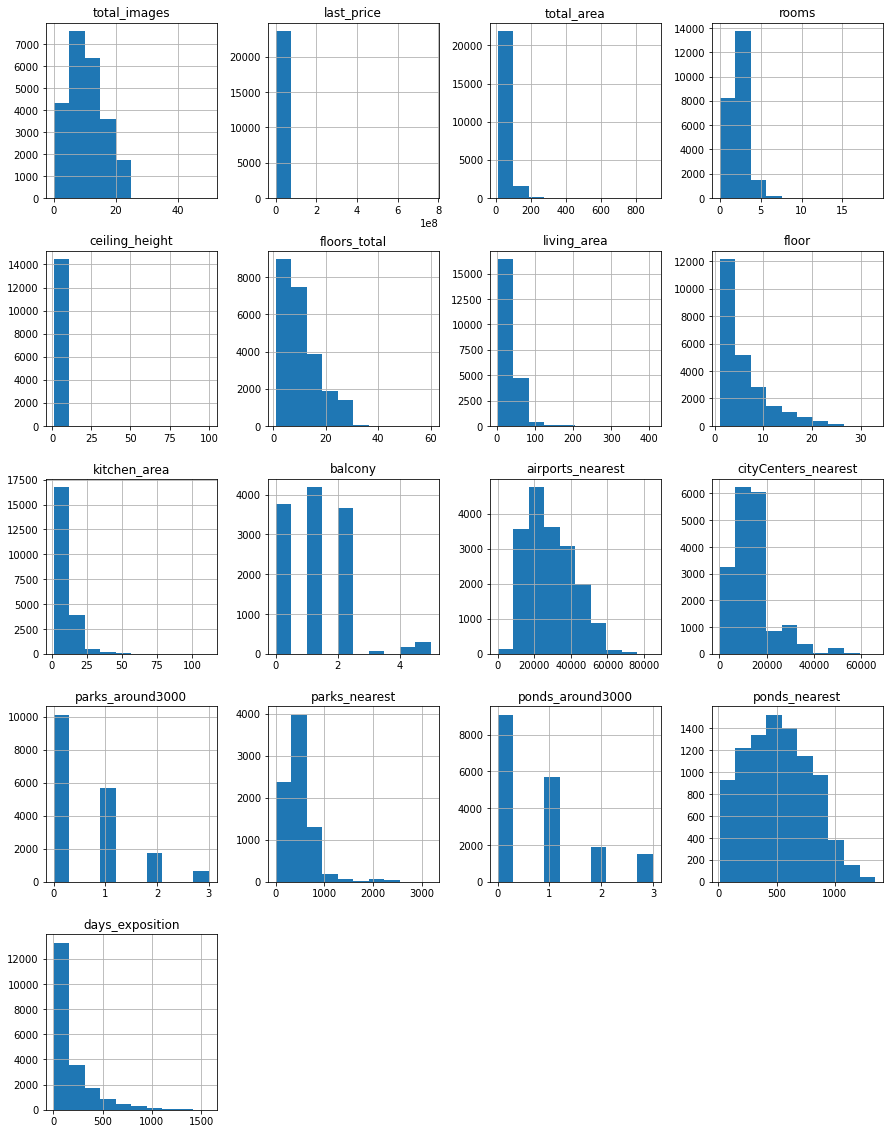

In [5]:
data.hist(figsize=(15, 20))
plt.show()

Different columns contain data of different types. In some cases, a certain type of data does not match the expected one. For example, in the columns *balcony*, *floors_total*, *parks_around3000* and *ponds_around3000* integer values were expected but not real values, and the data type in the column *is_apattment* should be boolean (true/false). This discrepancy is probably caused by missing or incorrectly filled values in the columns. 

The *studio* and *open_plan* columns have a boolean data type, so they are not displayed in the diagram, as well as *first_day_exposition*, *is_apartment* and *locality_name*, with the defined data type "object". Histograms cannot be drawn by them. The rest of the values are characterized by integer or real values. At the same time, some of them tend to normal distribution (e.g., *ponds_nearest*), some of them tend to Poisson distribution (e.g., *days_exposition*), while the distribution of others does not resemble any of the listed types (e.g., *balcony*). 

Special attention should be paid to the values in the *last_price* and *ceiling_height* columns, whose plots are represented by a single column, and to the *total_area*, *living_area*, and *kitchen_area* columns. These columns contain strong outliers and anomalies. Getting rid of sparse values should probably also be done in the *total_images*, *rooms* and *floors_total* columns.

### Data preprocessing

This section intends to correct existing problems in the data - omissions, data type mismatch, duplicates and anomalous values.

In [6]:
# missing values
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [7]:
# missing values in percentage
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


As a percentage, the columns *is_apartment*, *parks_nearest*, *ponds_nearest*, and *balcony* contain the largest number of omissions.

####  Column *is_apartment*

The *is_apartment* column, according to the description, should contain the answer to the question whether the apartment is an apartment, in true/false format. This data is manually filled in by the user. Unique values in the column:

In [8]:
data['is_apartment'].value_counts(dropna=False)

NaN      20924
False     2725
True        50
Name: is_apartment, dtype: int64

As can be seen, most of the values are missing (NaN). Since apartments (non-residential premises intended for living) are a rarer type of housing, it is most likely that users who did not provide information about it implied that this apartment is not an apartment. Then the missing values can be replaced with **False**.

In [9]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'].dtype

dtype('bool')

#### Column *balcony*

In the *balcony* column the seller indicated the number of balconies in the apartment. It is logical to assume that if the value is not specified, there are no balconies in the apartment. Let's replace the missing values with 0.

In [10]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'].dtype

dtype('float64')

The data type of the column is real numbers. However, the number of balconies cannot be fractional. Values should be cast to *int* type.

In [11]:
data['balcony'] = data['balcony'].astype('int64')
data['balcony'].dtype

dtype('int64')

Rare values in the column:

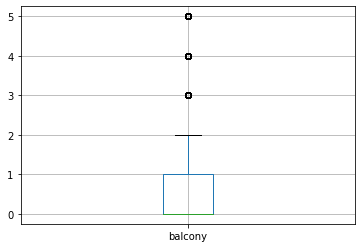

In [12]:
data.boxplot('balcony')
plt.show()

In [13]:
data.query('balcony > 2').shape[0] / data.shape[0]

0.02396725600236297

Rare values in this column represent only 2% of the current data volume. We can delete them.

In [14]:
data = data.query('balcony <= 2')
data.shape

(23131, 22)

#### Columns *living_area*, *kitchen_area* and *total_area*

In [15]:
data['living_area'].isnull().sum(), data['kitchen_area'].isnull().sum(), data['total_area'].isnull().sum()

(1869, 2262, 0)

The columns *living_area* and *kitchen_area* are responsible for the living area in square meters and the kitchen area in square meters, respectively. These two parameters are directly related to the total area of the apartment *total_area*. Since no gaps were found in the *total_area* column, it can be used to fill in missing values. However, before doing so, it should be checked for abnormal values.

In [16]:
data['total_area'].describe()

count    23131.000000
mean        59.815525
std         35.396855
min         12.000000
25%         40.000000
50%         51.300000
75%         68.800000
max        900.000000
Name: total_area, dtype: float64

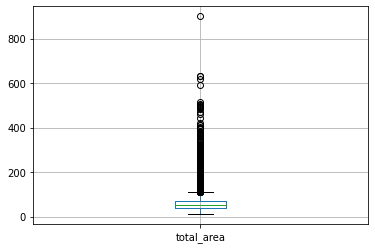

In [17]:
data.boxplot('total_area')
plt.show()

According to the boxplot, there are a large number of abnormally high values, the maximum of which reaches 900 square meters. Apartments with such an area are hard to imagine. Perhaps the reason for this was an incorrect record: the values are 10 times higher than the real ones.

In [18]:
data.query('total_area == 500 | total_area == 50').sort_values(by='last_price').tail(8)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
7298,4,9890000.0,50.0,2016-04-28T00:00:00,1,3.00,10.0,22.04,7,False,...,12.23,0,Санкт-Петербург,25442.0,6010.0,0.0,NaN,1.0,982.0,NaN
17964,5,10000000.0,50.0,2016-11-19T00:00:00,2,3.40,5.0,30.00,3,False,...,8.00,0,Санкт-Петербург,21534.0,1096.0,1.0,640.0,2.0,81.0,485.0
19249,10,12500000.0,50.0,2019-02-07T00:00:00,2,2.85,4.0,37.00,2,False,...,NaN,0,Санкт-Петербург,26945.0,5647.0,2.0,447.0,0.0,NaN,83.0
19803,14,13300000.0,50.0,2017-11-10T00:00:00,2,NaN,7.0,25.00,1,False,...,8.50,0,Санкт-Петербург,25530.0,4378.0,1.0,366.0,2.0,289.0,89.0
17196,7,13900000.0,50.0,2016-10-24T00:00:00,1,4.00,3.0,35.00,2,True,...,9.00,0,Санкт-Петербург,24418.0,1740.0,1.0,573.0,3.0,321.0,869.0
2802,7,14950000.0,50.0,2016-03-06T00:00:00,2,4.80,3.0,30.00,2,False,...,10.00,0,Санкт-Петербург,24433.0,1725.0,1.0,589.0,3.0,161.0,160.0
15016,8,150000000.0,500.0,2016-01-13T00:00:00,4,3.20,7.0,NaN,7,False,...,NaN,0,Санкт-Петербург,33058.0,6150.0,3.0,209.0,3.0,531.0,303.0
5893,3,230000000.0,500.0,2017-05-31T00:00:00,6,NaN,7.0,NaN,7,False,...,40.00,0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,50.0


However, if we compare the prices for apartments with, for example, 50 sq.m. and 500 sq.m., they as well as the values of the areas themselves differ by an order of magnitude or more, therefore, this is no longer a recording error, but real data. Nevertheless, the number of apartments with an area of more than 120 sq. m:

In [19]:
print('Итого:', data.query('total_area > 120')['total_area'].count())
print('Доля:', (data.query('total_area > 120')['total_area'].count() / data.shape[0]).round(2))

Итого: 1005
Доля: 0.04


4%. These lines can be discarded to get rid of more outliers. If the threshold is reduced (e.g. to 100), you will get rid of all outliers, but you will lose quite a lot of real data.

In [20]:
data = data.query('total_area <= 120')
data.shape

(22126, 22)

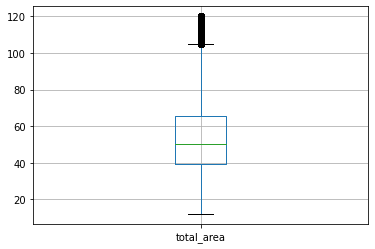

In [21]:
data.boxplot('total_area')
plt.show()

Anomalous and rare values in *living_area* and *kitchen_area*:

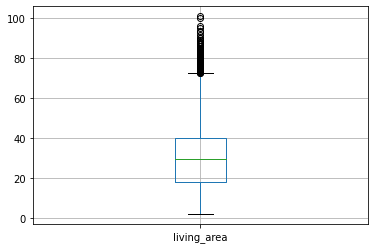

In [22]:
data.boxplot('living_area')
plt.show()

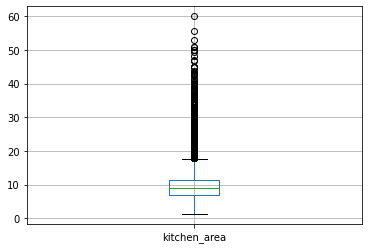

In [23]:
data.boxplot('kitchen_area')
plt.show()

Just like in the previous case, there are quite a lot of emissions, so it will not be possible to get rid of all of them without significant data loss. If we limit *living_area* to 75 square meters and *kitchen_area* to 20 square meters:

In [24]:
data.query('kitchen_area > 20 or living_area > 75').shape[0] / data.shape[0]

0.03204374943505378

We only lose 3% of the total dataframe volume.

In [25]:
data = data.query('(kitchen_area <= 20 or kitchen_area.isnull()) and (living_area <= 75 or living_area.isnull())')
data.shape

(21417, 22)

Since *living_area* and *kitchen_area* values are related to the total area of the apartment, the gaps can be filled by multiplying the current *total_area* values by the shares of living area and kitchen area relative to the total, respectively. In doing so, median shares should be calculated, as the median is more robust to outliers remaining in the columns.

In [26]:
# creating a separate table for calculations
area_table = data.loc[:, ['total_area', 'living_area', 'kitchen_area']]
area_table['living_rate'] = data['living_area'] / data['total_area']
area_table['kitchen_rate'] = data['kitchen_area'] / data['total_area']
area_table.head()

,total_area,living_area,kitchen_area,living_rate,kitchen_rate
1,40.4,18.6,11.0,0.460396,0.272277
2,56.0,34.3,8.3,0.612500,0.148214
5,30.4,14.4,9.1,0.473684,0.299342
6,37.3,10.6,14.4,0.284182,0.386059
7,71.6,NaN,18.9,NaN,0.263966


In [27]:
living_median = area_table['living_rate'].median()
kitchen_median = area_table['kitchen_rate'].median()
living_median.round(2), kitchen_median.round(2)

(0.57, 0.17)

In [28]:
data['living_area'] = data['living_area'].fillna(data['total_area'] * living_median)
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area'] * kitchen_median)

Missing values in the columns:

In [29]:
data['living_area'].isnull().sum(), data['kitchen_area'].isnull().sum()

(0, 0)

#### Column *locality_name*

The *locality_name* contains the names of settlements. Since it is impossible to find out unspecified names (49 pcs) using information from other columns and logical assumptions, let's replace omissions with **unknown** value.

In [30]:
data['locality_name'] = data['locality_name'].fillna('unknown')
data['locality_name'].isnull().sum()

0

Unique column values:

In [31]:
print(data['locality_name'].unique())
print('Итого:', data['locality_name'].nunique())

['посёлок Шушары' 'Санкт-Петербург' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'Всеволожск' 'Волхов'
 'Кингисепп' 'Приозерск' 'Сестрорецк' 'деревня Куттузи' 'посёлок Аннино'
 'поселок городского типа Ефимовский' 'посёлок Плодовое'
 'деревня Заклинье' 'поселок Торковичи' 'поселок Первомайское'
 'Красное Село' 'посёлок Понтонный' 'Сясьстрой' 'деревня Старая'
 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы' 'село Путилово'
 'Ивангород' 'Шлиссельбург' 'Никольское' 'Зеленогорск' 'Сосновый Бор'
 'поселок Новый Свет' 'деревня Оржицы' 'деревня 

In addition to proper names, there are different types of settlements in the names: settlements (including urban type), villages, partnerships, etc. For convenience in searching for implicit duplicates, you can separate them into a separate column, and proper names - into another one using the **define_locality_type** function.

In [32]:
def define_locality_type(locality, column='loc_type'):
    locality_list = locality.split(' ')
    name_list, type_list = [], []
    for word in locality_list:
        if word.islower():
            type_list.append(word)
        else:
            name_list.append(word)
    if column == 'loc_name' and locality != 'unknown':
        return ' '.join(name_list)
    return ' '.join(type_list)

In [33]:
# check
print(define_locality_type('поселок Кузнецово', 'loc_name'))
print(define_locality_type('поселок Кузнецово'))
print(define_locality_type('unknown', 'loc_name'))

Кузнецово
поселок
unknown


In [34]:
data['locality_type'] = data['locality_name'].apply(define_locality_type)
data['locality_type'].unique()

array(['посёлок', '', 'городской посёлок', 'деревня',
       'поселок городского типа', 'поселок', 'посёлок городского типа',
       'садовое товарищество', 'село', 'городской поселок', 'unknown',
       'поселок городского типа имени', 'поселок станции',
       'посёлок городского типа имени',
       'садоводческое некоммерческое товарищество',
       'посёлок 69-й километр', 'посёлок при железнодорожной станции',
       'посёлок станции', 'коттеджный поселок', 'коттеджный посёлок'],
      dtype=object)

We can distinguish 5 main types of settlements: settlement, village, SNT, village and ' '. The last one is responsible for the unspecified type of settlement - city.

The **categorize_loc_type** function converts the previous settlement types into new ones, thus eliminating implicit duplicates in the data.

In [35]:
def categorize_loc_type(loc_type):
    if loc_type in ['деревня', 'село', 'unknown']:
        return loc_type
    if 'товарищество' in loc_type:
        return 'СНТ'
    if loc_type == '':
        return 'город'
    return 'поселок'

In [36]:
# check
print(categorize_loc_type('село'))
print(categorize_loc_type('поселок городского типа'))
print(categorize_loc_type('садоводческое некоммерческое товарищество'))

село
поселок
СНТ


In [37]:
data['locality_type'] = data['locality_type'].apply(categorize_loc_type)

In [38]:
data['locality_type'].unique()

array(['поселок', 'город', 'деревня', 'СНТ', 'село', 'unknown'],
      dtype=object)

Similarly, let's separate the proper names into a separate column.

In [39]:
data['locality_name'] = (
    data['locality_name'].apply(lambda x: define_locality_type(x, 'loc_name'))
)

In [40]:
print(sorted(data['locality_name'].unique()))
print('Итого:', data['locality_name'].nunique())

['unknown', 'Агалатово', 'Александровская', 'Алексеевка', 'Аннино', 'Аро', 'Барышево', 'Батово', 'Бегуницы', 'Белогорка', 'Белоостров', 'Бокситогорск', 'Большая Вруда', 'Большая Ижора', 'Большая Пустомержа', 'Большие Колпаны', 'Большое Рейзино', 'Большой Сабск', 'Бор', 'Борисова Грива', 'Бугры', 'Будогощь', 'Ваганово', 'Важины', 'Вартемяги', 'Вахнова Кара', 'Вещево', 'Виллози', 'Вознесенье', 'Возрождение', 'Войсковицы', 'Войскорово', 'Володарское', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг', 'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово', 'Гарболово', 'Гатчина', 'Гладкое', 'Глажево', 'Глебычево', 'Глинка', 'Гончарово', 'Горбунки', 'Гостилицы', 'Громово', 'Дзержинского', 'Дружная Горка', 'Дружноселье', 'Дубровка', 'Елизаветино', 'Ефимовский', 'Жилгородок', 'Жилпосёлок', 'Житково', 'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск', 'Зимитицы', 'Ивангород', 'Извара', 'Ильичёво', 'Иссад', 'Калитино', 'Каложицы', 'Кальтино', 'Каменногорск', 'Камышовка', 'Кело

The number of unique values decreased from 361 to 302, hence posti 60 implicit duplicates were removed, no others were found. Gaps in columns:

In [41]:
data['locality_name'].isnull().sum(), data['locality_type'].isnull().sum()

(0, 0)

#### Column *ceiling_height*

In [42]:
# missing values
data['ceiling_height'].isnull().sum()

8506

The *ceiling_height* column contains information about the height of the ceilings in the apartment.

In [43]:
data['ceiling_height'].describe()

count    12911.000000
mean         2.730321
std          0.944404
min          1.000000
25%          2.500000
50%          2.600000
75%          2.750000
max         32.000000
Name: ceiling_height, dtype: float64

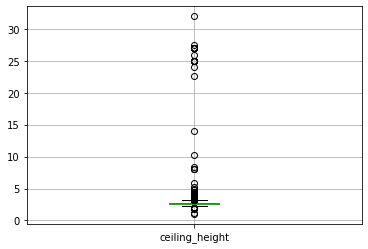

In [44]:
data.boxplot('ceiling_height')
plt.show()

As can be seen from the sweep diagram, this column contains anomalously large values with a median value of about 2.6 meters. It can be assumed that some values are recorded incorrectly (10 times larger than the real ones).

In [45]:
data.query('ceiling_height == 2.5 or ceiling_height == 25').sort_values(by='ceiling_height').tail(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_type
7862,4,1180000.0,33.0,2018-12-28T00:00:00,1,2.5,9.0,20.0,2,False,...,1,Кириши,NaN,NaN,NaN,NaN,NaN,NaN,59.0,город
7869,10,6200000.0,57.0,2018-10-16T00:00:00,2,2.5,16.0,30.0,11,False,...,2,Санкт-Петербург,41912.0,10793.0,1.0,235.0,0.0,NaN,33.0,город
7805,9,5400000.0,60.0,2015-08-05T00:00:00,3,2.5,9.0,42.0,4,False,...,0,Санкт-Петербург,12504.0,12416.0,0.0,NaN,1.0,431.0,1210.0,город
6246,6,3300000.0,44.4,2019-03-25T00:00:00,2,25.0,5.0,31.3,5,False,...,0,Кронштадт,68923.0,50649.0,1.0,417.0,2.0,73.0,NaN,город
9379,5,3950000.0,42.0,2017-03-26T00:00:00,3,25.0,5.0,30.0,2,False,...,0,Санкт-Петербург,11647.0,13581.0,0.0,NaN,0.0,NaN,NaN,город
14382,9,1700000.0,35.0,2015-12-04T00:00:00,1,25.0,5.0,20.0,2,False,...,1,Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,206.0,поселок
4643,0,4300000.0,45.0,2018-02-01T00:00:00,2,25.0,9.0,30.0,2,False,...,1,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0,город
11285,0,1950000.0,37.0,2019-03-20T00:00:00,1,25.0,5.0,17.0,4,False,...,2,Луга,NaN,NaN,NaN,NaN,NaN,NaN,18.0,город
18545,6,3750000.0,43.0,2019-03-18T00:00:00,2,25.0,5.0,29.0,3,False,...,0,Санкт-Петербург,27054.0,8033.0,1.0,540.0,0.0,NaN,12.0,город
355,17,3600000.0,55.2,2018-07-12T00:00:00,2,25.0,5.0,32.0,2,False,...,2,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0,город


Most likely this hypothesis is correct. Prices for apartments with ceiling heights of 2.5 m and 25 m are similar, and in general, values of the parameter > 10 m look unrealistic. You can use the **decrease_value** function and bring the outlier values to the expected ones.

In [46]:
# the function decreases the value by a factor of 10 if it is greater than the limit
def decrease_value(value, limit):
    if value > limit:
        return value / 10
    return value

In [47]:
data['ceiling_height'] = data['ceiling_height'].apply(lambda x: decrease_value(x, 10))

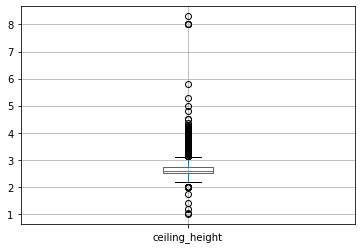

In [48]:
data.boxplot('ceiling_height')
plt.show()

The number of anomalies has decreased. Percentage of remaining outlier values:

In [49]:
data.query('ceiling_height <= 2.0 or ceiling_height >= 3.2')['total_area'].count() / data.shape[0]

0.030723257225568474

Approximately 3%. Let's limit the ceiling height: further we will consider only apartments with ceiling height from 2 to 3.2 meters.

In [50]:
data = data.query('2.0 < ceiling_height < 3.2 or ceiling_height.isnull()')
data.shape[0]

20759

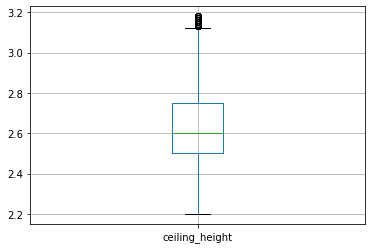

In [51]:
data.boxplot('ceiling_height')
plt.show()

There are still high values at the top, but if you remove them from the dataframe, you may lose a more significant part of the data. We use median values of ceiling heights by population centers to fill in the gaps:

In [ ]:
for locality_name in data['locality_name'].unique():
    median = data.loc[data['locality_name'] == locality_name, 'ceiling_height'].median()
    data.loc[(data['ceiling_height'].isna()) & (data['locality_name'] == locality_name), 'ceiling_height'] = median

# fill in the remaining gaps with the column median
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

In [53]:
data['ceiling_height'].isnull().sum()

0

#### Column *floors_total*

In [54]:
data['floors_total'].isnull().sum()

79

The *floors_total* column indicates the total number of floors in the house. The values in this column correlate with the values in the *floor* column. Logically, the total number of floors in the building cannot be greater than the value of the floor on which the apartment is located. So we can try to replace the missing values with the same values. Since there are few missing values (<1% of the current data size), this replacement will not affect the distribution much.

In [55]:
# correlation with 'floor'
data['floors_total'].corr(data['floor'])

0.6725442036474629

In [56]:
data['floors_total'] = data['floors_total'].fillna(data['floor'])
data['floors_total'].isnull().sum()

0

The total number of floors in the house cannot be fractional, so the data type in this column must be integer.

In [57]:
data['floors_total'] = data['floors_total'].astype('int')
data['floors_total'].dtype

dtype('int64')

Let's take a look at the rare and knock out values:

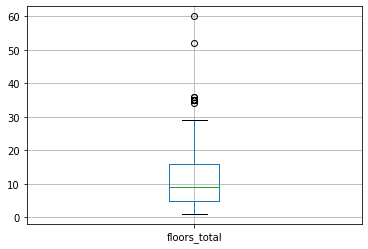

In [58]:
data.boxplot('floors_total')
plt.show()

In [59]:
data.query('floors_total >= 30').shape[0] / data.shape[0]

0.0011079531769353052

If we delete the rows with these knockout values, not a significant portion of the data is lost (only 0.1%). After deletion:

In [60]:
data = data.query('floors_total < 30')
data.shape

(20736, 23)

#### Columns *parks_around3000* and *ponds_around3000*

In [61]:
data.query('parks_around3000.isnull() and ponds_around3000.isnull()').shape

(5236, 23)

In [62]:
print(data['parks_around3000'].unique())
print(data['ponds_around3000'].unique())

[ 0.  1. nan  3.  2.]
[ 0.  2. nan  3.  1.]


Each of these parameters can take real values from 0 to 3.
At the same time, the number of omissions in these columns is the same and they are observed in the same rows. They are probably caused by the same reason. 

Number of unique values by settlement type for parks and ponds:

In [63]:
data.groupby('locality_type')['parks_around3000'].nunique()

locality_type
unknown    4
СНТ        0
город      4
деревня    0
поселок    3
село       0
Name: parks_around3000, dtype: int64

In [64]:
data.groupby('locality_type')['ponds_around3000'].nunique()

locality_type
unknown    4
СНТ        0
город      4
деревня    0
поселок    4
село       0
Name: ponds_around3000, dtype: int64

As can be seen, the number of parks within a 3m radius is not specified for villages, SNTs and hamlets. That is, settlements of small size. It can be assumed that for them the concept of "park" as such is not applicable (in the sense of an ennobled natural area), but there may be forests, groves or other objects of natural origin nearby, so replacing omissions in the *parks_around3000* column with 0 is not very correct. About water bodies (column *ponds_around3000*) also we cannot assume any logical replacement. Therefore, the omissions in these two columns are left. The data type cannot be changed to int either because of missing values.

#### Columns *parks_nearest* and *ponds_nearest*

In [65]:
data['parks_nearest'].isnull().sum(), data['ponds_nearest'].isnull().sum()

(14324, 13326)

In [66]:
data.query('parks_nearest.isnull() and ponds_nearest.isnull()').sample(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_type
21985,16,6900000.0,74.0,2018-11-07T00:00:00,3,2.75,4,45.5,3,False,...,2,Сестрорецк,54526.0,35625.0,0.0,NaN,0.0,NaN,87.0,город
15144,0,2790000.0,35.6,2018-02-22T00:00:00,1,2.75,17,14.9,6,False,...,2,Бугры,NaN,NaN,NaN,NaN,NaN,NaN,117.0,поселок
494,15,5100000.0,60.5,2017-05-12T00:00:00,2,2.65,18,29.8,10,False,...,1,Санкт-Петербург,42534.0,21823.0,0.0,NaN,0.0,NaN,277.0,город
1041,9,4450000.0,82.0,2018-06-18T00:00:00,3,2.65,10,43.0,1,False,...,0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,95.0,город
11006,14,5500000.0,43.5,2018-06-15T00:00:00,1,2.78,16,22.4,4,False,...,1,Санкт-Петербург,33827.0,12489.0,0.0,NaN,0.0,NaN,4.0,город


In [67]:
data['parks_nearest'].describe()

count    6412.000000
mean      499.116500
std       346.086572
min         1.000000
25%       295.750000
50%       459.500000
75%       619.000000
max      3190.000000
Name: parks_nearest, dtype: float64

In [68]:
data['ponds_nearest'].describe()

count    7410.000000
mean      533.102834
std       274.828700
min        13.000000
25%       320.000000
50%       516.500000
75%       739.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

As for the *parks_nearest* and *ponds_nearest* columns, which are responsible for the distance to the nearest park/pond and are associated with *parks_around3000* and *ponds_around3000* respectively: there are many more omissions. This is because if there are no parks/ponds within a 3 km radius, the column with distance to the nearest park/pond is very likely to have a skip. The skips due to this reason can be replaced by, for example, 4000. This would mean that the nearest park/pond is further than 3 km away.

In [69]:
data.loc[data['parks_around3000'] == 0, 'parks_nearest'] = data.loc[data['parks_around3000'] == 0, 'parks_nearest'].fillna(4000)

In [70]:
data.loc[data['ponds_around3000'] == 0, 'ponds_nearest'] = data.loc[data['ponds_around3000'] == 0, 'ponds_nearest'].fillna(4000)

In [71]:
data['parks_nearest'].isnull().sum(), data['ponds_nearest'].isnull().sum()

(5236, 5236)


The number of passes in these columns equaled the number of passes in the *parks_around3000* and *ponds_around3000* columns.

#### Columns *airports_nearest* and *cityCenters_nearest*

In [72]:
data['airports_nearest'].isnull().sum(), data['cityCenters_nearest'].isnull().sum()

(5255, 5237)

The columns *airports_nearest* and *cityCenters_nearest* show the distances to the nearest airport and city center, respectively. At the same time, the number of gaps in these columns is almost identical to the number of gaps in the previously discussed columns with map data. Unfortunately, it is not possible to fill them with some logically appropriate values, so we should leave them alone.

#### Column *last_price*

There are no omissions in this column, which is responsible for the price of the apartment. However, judging by the histogram plotted at the beginning of the section, anomalous values are present. The spread diagram illustrates this in detail:

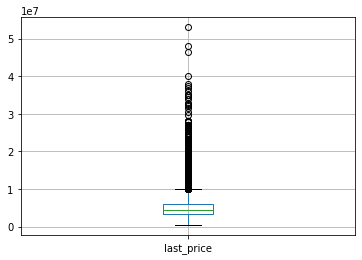

In [73]:
data.boxplot('last_price')
plt.show()

Share of apartments where the last price is more than 10 mln:

In [74]:
data.query('last_price > 10000000').shape[0] / data.shape[0]

0.05222800925925926

About 5%. We can delete these rows from the dataframe to maintain data purity.

In [75]:
data = data.query('last_price <= 10000000')
data.shape[0]

19653

We should also change the data type in this column to integer - this will make prices easier to understand.

In [76]:
data['last_price'] = data['last_price'].astype(int)
data['last_price'].dtype

dtype('int64')

#### Column *first_day_exposition*

There are no omissions in this column. However, for convenience of further work it is necessary to convert the data in the column to *datetime*.

In [77]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['first_day_exposition'].dtype

dtype('<M8[ns]')

#### Columns *rooms* and *total_images*

There are also no omissions in the *rooms* and *total_images* columns. However, there are rare values:

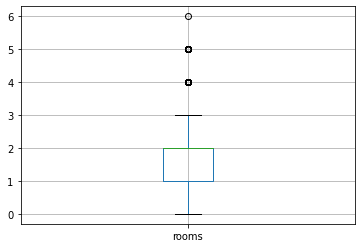

In [78]:
data.boxplot('rooms')
plt.show()

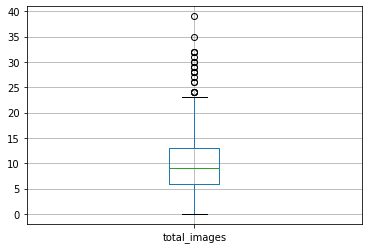

In [79]:
data.boxplot('total_images')
plt.show()

In [80]:
data.query('total_images > 23 or rooms > 3').shape[0] / data.shape[0]

0.03068233857426347

About 3% of the current data size. You can remove them from the data under study.

In [81]:
data = data.query('total_images <= 23 and rooms <= 3')
data.shape

(19050, 23)

#### Column *days_exposition*

In the *days_exposition* column, the values correspond to the number of days during which the ad was placed (from publication to withdrawal). It can be assumed that missing values in this column indicate that the ad was up to date at the time the data was uploaded. Filling in the gaps (e.g., with the difference between the maximum posting date, the so-called upload date, and the specified posting date) in such a case is **not advisable**: it may affect the correct distribution of the actual data.

In [82]:
print(
    'Доля актуальных объявлений:',
    (data['days_exposition'].isnull().sum() / data.shape[0]).round(2)
)

Доля актуальных объявлений: 0.11


The expected data type in this column is integer (int). However, because the blanks are not filled in, it is not possible to change it within the entire dataframe. In a further study, if necessary, a slice of the dataframe consisting only of already irrelevant announcements can be considered.

#### Checking for obvious duplicates

In [83]:
data.duplicated().sum()

0

No obvious duplicates were found in the dataframe.

#### Result

In [84]:
data.isnull().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest        5118
cityCenters_nearest     5107
parks_around3000        5107
parks_nearest           5107
ponds_around3000        5107
ponds_nearest           5107
days_exposition         2164
locality_type              0
dtype: int64

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19050 entries, 1 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          19050 non-null  int64         
 1   last_price            19050 non-null  int64         
 2   total_area            19050 non-null  float64       
 3   first_day_exposition  19050 non-null  datetime64[ns]
 4   rooms                 19050 non-null  int64         
 5   ceiling_height        19050 non-null  float64       
 6   floors_total          19050 non-null  int64         
 7   living_area           19050 non-null  float64       
 8   floor                 19050 non-null  int64         
 9   is_apartment          19050 non-null  bool          
 10  studio                19050 non-null  bool          
 11  open_plan             19050 non-null  bool          
 12  kitchen_area          19050 non-null  float64       
 13  balcony         

In [86]:
data.shape[0]

19050

- Data types have been adjusted to the expected and gaps filled in almost all columns except those containing map data - distances, number of parks/water bodies, and the *days_exposition* column, where gaps presumably show the relevance of the announcement.
- In all columns with numeric data types, most of the anomalous and rare values were eliminated.
- In the *locality_name* column, implicit duplicates were removed. In addition, a new column *locality_type* appeared in the dataframe, where the type of settlement was removed.
After all the transformations, the total data volume was reduced by about 20%.

### Creating new columns

In [87]:
# price per square meter
data['one_m_price'] = (data['last_price'] / data['total_area']).round()

In [88]:
# the day of the week the ad was published (0-Monday, 1-Tuesday, etc.)
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday

In [89]:
# advertisement publication month
data['month_exposition'] = data['first_day_exposition'].dt.month

In [90]:
# advertisement publication year
data['year_exposition'] = data['first_day_exposition'].dt.year

In [91]:
# function for determining the type of floor
def define_type_floor(row):
    
    last_floor = row['floors_total']
    floor = row['floor']
    
    if floor == 1:
        return 'первый'
    elif floor == last_floor:
        return 'последний'
    
    return 'другой'

In [92]:
# type of apartment floor (values: "first", "last", "other")
data['type_floor'] = data.apply(define_type_floor, axis=1)

In [93]:
# distance from the city center in km
data['cityCenters_nearest_km'] = (data['cityCenters_nearest'] / 1000).round()

In [94]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,locality_type,one_m_price,weekday_exposition,month_exposition,year_exposition,type_floor,cityCenters_nearest_km
1,7,3350000,40.4,2018-12-04,1,2.600,11,18.600000,1,False,...,0.0,4000.0,81.0,поселок,82921.0,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,2.650,5,34.300000,4,False,...,2.0,574.0,558.0,город,92786.0,3,8,2015,другой,14.0
5,10,2890000,30.4,2018-09-10,1,2.625,12,14.400000,5,False,...,NaN,NaN,55.0,поселок,95066.0,0,9,2018,другой,NaN
6,6,3700000,37.3,2017-11-02,1,2.640,26,10.600000,6,False,...,0.0,4000.0,155.0,поселок,99196.0,3,11,2017,другой,19.0
7,5,7915000,71.6,2019-04-18,2,2.650,24,40.713725,22,False,...,0.0,4000.0,NaN,город,110545.0,3,4,2019,другой,12.0


### Exploratory data analysis

#### Examination of parameters

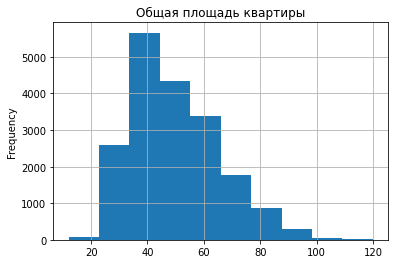

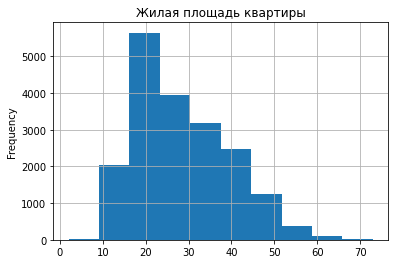

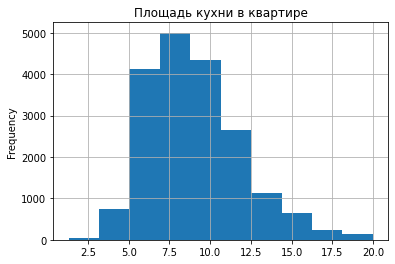

In [95]:
data['total_area'].plot(kind='hist', grid=True, title='Общая площадь квартиры')
plt.show()

data['living_area'].plot(kind='hist', grid=True, title='Жилая площадь квартиры')
plt.show()

data['kitchen_area'].plot(kind='hist', grid=True, title='Площадь кухни в квартире')
plt.show()

The parameters *total_area*, *living_area* and *kitchen_area* are responsible for the area: total apartment area, living area and kitchen area, respectively. They have a similar distribution, tending towards normal, due to the general similarity of the data and the chosen method of filling in the gaps. At the same time, the total floor area values lie within a wider range - i.e. they have a wider distribution. The narrowest distribution is characterized by the kitchen area.

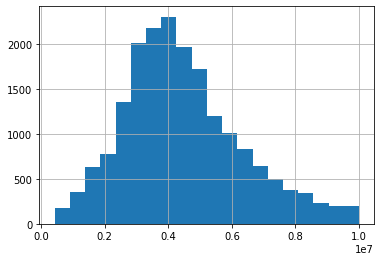

In [96]:
data['last_price'].hist(bins=20)
plt.show()

The object price parameter also has a distribution inclined to normal, but with a more symmetrical shape. The peak is approximately at 4 million rubles. Most of the apartments are sold at a price close to this.

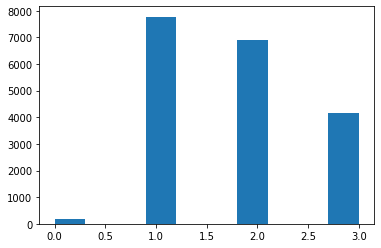

In [97]:
data['rooms'].hist(grid=False)
plt.show()

"The more rooms in the apartment, the fewer such apartments" - such dependence can be observed for apartments with from 1 to 3 rooms. The chart also shows that there is a certain number of 0-room apartments (extremely small in comparison with other offers). Probably, this is how studio apartments are represented in the data.

In [98]:
data.query('rooms == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,locality_type,one_m_price,weekday_exposition,month_exposition,year_exposition,type_floor,cityCenters_nearest_km
144,1,2450000,27.00,2017-03-30,0,2.70,24,15.500000,2,False,...,NaN,NaN,181.0,поселок,90741.0,3,3,2017,другой,NaN
349,4,2320000,25.00,2017-09-27,0,2.75,14,17.000000,1,False,...,NaN,NaN,45.0,деревня,92800.0,2,9,2017,первый,NaN
440,8,2480000,27.11,2018-03-12,0,2.65,17,24.750000,4,False,...,2.0,982.0,64.0,город,91479.0,0,3,2018,другой,15.0
508,0,3375000,34.40,2017-03-28,0,2.64,26,24.300000,19,False,...,1.0,593.0,430.0,поселок,98110.0,1,3,2017,другой,19.0
608,2,1850000,25.00,2019-02-20,0,2.60,10,14.215686,7,False,...,NaN,NaN,29.0,поселок,74000.0,2,2,2019,другой,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000,26.00,2017-09-01,0,2.65,25,18.000000,16,False,...,1.0,623.0,14.0,город,123077.0,4,9,2017,другой,13.0
23442,0,2500000,27.70,2017-09-28,0,2.70,24,18.000000,4,False,...,NaN,NaN,4.0,поселок,90253.0,3,9,2017,другой,NaN
23554,15,3350000,26.00,2018-09-07,0,2.65,19,14.784314,8,False,...,2.0,112.0,31.0,город,128846.0,4,9,2018,другой,17.0
23592,10,1450000,29.00,2017-11-11,0,2.56,9,18.000000,8,False,...,NaN,NaN,82.0,город,50000.0,5,11,2017,другой,NaN


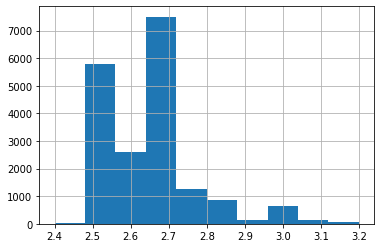

In [99]:
data['ceiling_height'].hist(range=(2.4, 3.2))
plt.show()

The distribution of this value resembles something between the normal distribution and the Poisson distribution. It can be seen that most of the values are between 2.5 and 2.7. These are the standard values for the ceiling height in an apartment.

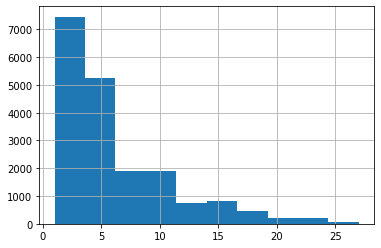

In [100]:
data['floor'].hist()
plt.show()

The distribution of the apartment floor number is already more similar to a Poisson distribution: the higher the value, the rarer it is. Most of the apartments are located on floors 1-5. Apartments on the 25th floor and above are almost not represented in the data.

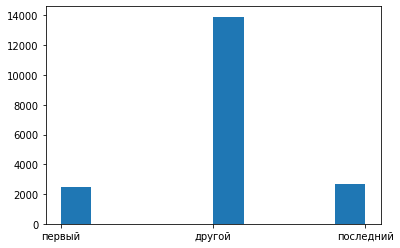

In [101]:
data['type_floor'].hist(grid=False)
plt.show()

By type, the floors are distributed in a "normal" way. Most of the apartments are neither on the first nor on the last floor of the building, but on some other floor. Apartments on the outermost floors are sparsely represented.

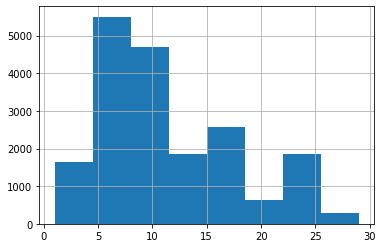

In [102]:
data['floors_total'].hist(bins=8)
plt.show()

The total number of floors in a house also tends to obey a distribution close to normal, however, its shape is rather asymmetric. Most of the houses contain from 5 to 10 floors. When moving from the peak of the graph to the sides, the number of corresponding apartments decreases.

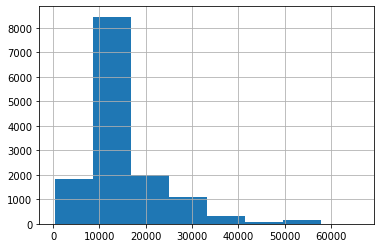

In [103]:
data['cityCenters_nearest'].hist(bins=8)
plt.show()

The distance from the apartment to the city center (in m) also resembles normal, but with an asymmetric right end. Most of the apartments are located within 10-15 km from the city center. There are not many apartments located close to the center or further than 20 km from the center.

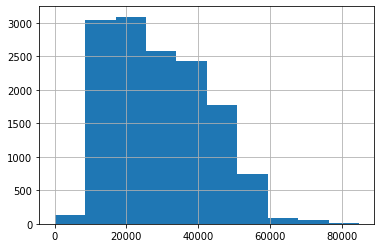

In [104]:
data['airports_nearest'].hist()
plt.show()

The distribution of distance to the nearest airport is difficult to assign unambiguously to any type, more likely it resembles an extremely asymmetric normal. Often airports are located outside the city or on its outskirts, and there are more high values: from 15 to 60 km.

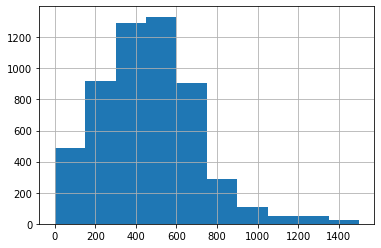

In [105]:
data['parks_nearest'].hist(range=(0, 1500))
plt.show()

For this parameter, we had to limit the Oh axis, because there are a large number of values equal to 4000m, obtained by filling in the gaps. The distribution of other values tends to be normal, but with an asymmetric right end, like most of the distributions considered above. Values around 500m are most common - parks are relatively close to apartments. Values lower or higher are less common.

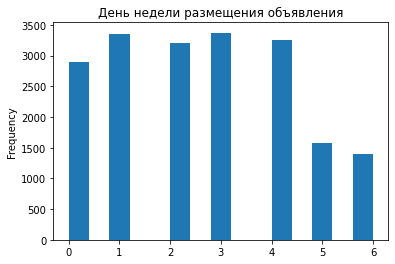

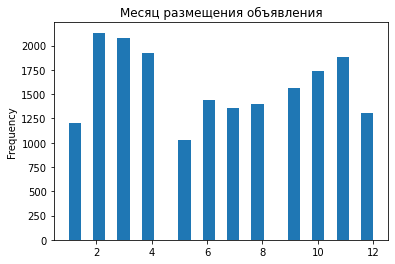

In [106]:
data['weekday_exposition'].plot(kind='hist', bins=15, grid=False, title='День недели размещения объявления')
plt.show()

data['month_exposition'].plot(kind='hist', bins=25, grid=False, title='Месяц размещения объявления')
plt.show()

Most of the ads were placed on weekdays (Fri to Fri). On weekends much less.
As for the month of placement, we can observe seasonality: most of the ads are placed in late winter - early spring (maximum placed in February), closer to summer the number of ads decreases. At the same time, January, December and May are characterized by the smallest values. For January and December, it can be assumed that this is due to the New Year and a large number of non-working days.

#### Speed of apartment sales

After studying the distribution of basic parameters, we can move on to more "practical" issues. For example, let's study how fast apartments sell.

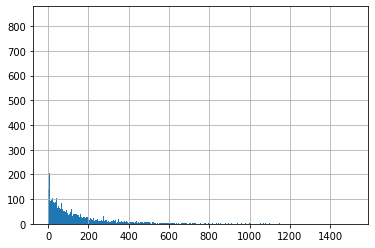

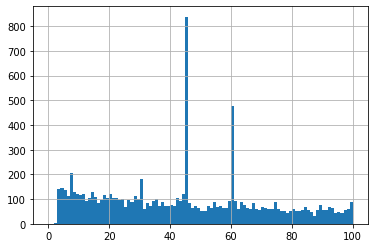

In [129]:
data['days_exposition'].hist(bins=1500)
plt.show()

data['days_exposition'].hist(range=(0, 100), bins=100)
plt.show()

This parameter reflects the number of days the ad has been "hanging". In general, it would seem that the distribution of values resembles a Poisson distribution. However, if you look "closer", you can see the peaks at the following values:

In [108]:
data['days_exposition'].value_counts().head()

45.0    838
60.0    477
7.0     204
30.0    183
4.0     146
Name: days_exposition, dtype: int64

That is, almost a thousand apartments were sold 1.5 months after the advertisement was placed. About 500 more - after 2 months and about 200 - after exactly one week.

Let's also calculate the mean and median:

In [109]:
print('Среднее кол-во дней:', data['days_exposition'].mean().round())
print('Медианное кол-во дней:', data['days_exposition'].median().round())

Среднее кол-во дней: 167.0
Медианное кол-во дней: 89.0


The obtained values are higher than the most frequent ones found. On average, an apartment is sold in 167 days (almost half a year). At the same time, the median value is 89 days. It means that half of the considered apartments were sold much faster - in 3 months or less. The maximum values of this parameter exceed a thousand days - more than 3 years.

Thus, according to the obtained distribution and calculated values, we can divide all sales into "fast" (2 months and less), "medium" (from 2 months to a year) and "long" (from a year and more).

#### Impact on the price of the apartment

It is also important for us to know what and how the value of the apartment is affected.

In [110]:
data.corr()['last_price'].sort_values()

cityCenters_nearest_km   -0.314586
cityCenters_nearest      -0.314319
parks_nearest            -0.076119
studio                   -0.072844
ponds_nearest            -0.052897
open_plan                -0.048731
airports_nearest         -0.017156
weekday_exposition       -0.010560
month_exposition         -0.000586
is_apartment              0.014226
year_exposition           0.018358
days_exposition           0.036905
balcony                   0.043014
parks_around3000          0.064385
ponds_around3000          0.090288
total_images              0.159715
floor                     0.174205
floors_total              0.260266
ceiling_height            0.350624
rooms                     0.398353
kitchen_area              0.475798
living_area               0.516317
total_area                0.639902
one_m_price               0.641850
last_price                1.000000
Name: last_price, dtype: float64

Such parameters as price per sq.m.(*one_m_price*), total, kitchen, living area of the apartment(*total_area*, *kitchen_area*, *living_area*), number of rooms (*rooms*) and distance from the city center(*cityCenters_nearest*) correlate most strongly with the apartment price. Moreover, the last parameter has a negative correlation coefficient with the price.

Living area and price per square meter directly depend on the total area of the apartment (some values, in particular, are calculated using this parameter). Therefore, first of all, it is worth looking at the scatter diagram of *total_area* and *last_price* to make sure that there is a dependence.

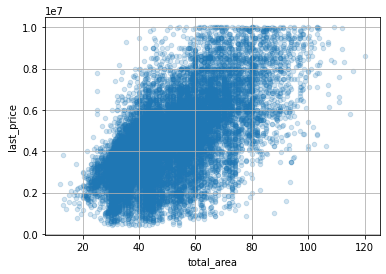

In [111]:
data.plot(x='total_area', y='last_price', kind='scatter', sharex=False, grid=True, alpha=0.2)
plt.show()

The dependence can indeed be traced: the larger the total area of the apartment, the higher its value. Scatter diagrams for other known area parameters:

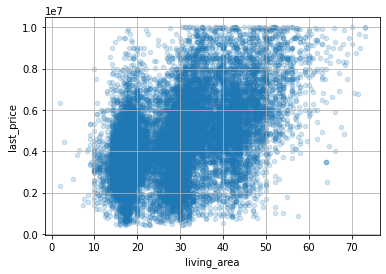

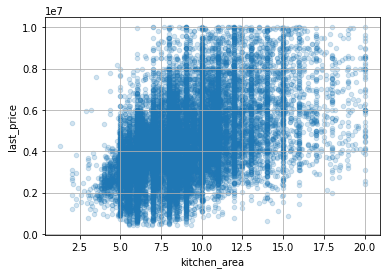

In [112]:
data.plot(x='living_area', y='last_price', kind='scatter', sharex=False, grid=True, alpha=0.2)
plt.show()

data.plot(x='kitchen_area', y='last_price', kind='scatter', sharex=False, grid=True, alpha=0.2)
plt.show()

The resulting "clouds" are characterized by a greater scatter of values, however, the general direction can be attributed to positive correlation. In the scatter plot of the kitchen area, one can also notice smooth vertical bands of dots. These may be values that have been replaced by omissions.
As for the price per square meter:

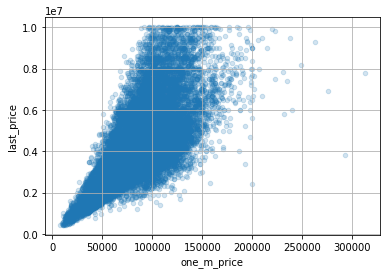

In [113]:
data.plot(x='one_m_price', y='last_price', kind='scatter', sharex=False, grid=True, alpha=0.2)
plt.show()

It can be seen that the dependence is direct: the higher the price of 1 sq.m., the higher the cost of the apartment. It is especially well traced at small values of parameters. Further the spread becomes larger.

Influence of distance from the city center:

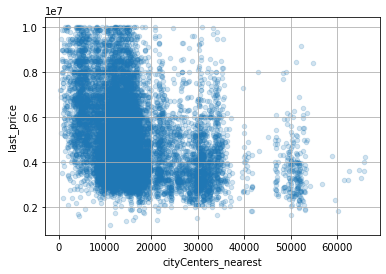

In [114]:
data.plot(x='cityCenters_nearest', y='last_price', kind='scatter', sharex=False, grid=True, alpha=0.2)
plt.show()

It is difficult to assess unambiguously, although a semblance of a weak negative correlation can still be noticed. The closer to the city center, the more expensive apartments and apartment offers in general are found.

Now let's look at the influence of categorical variables such as number of rooms, type of floor and dates of placement.

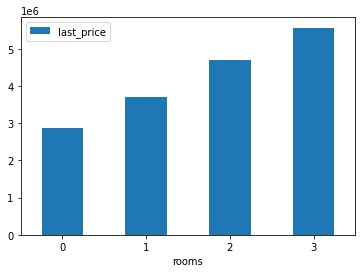

In [115]:
data.pivot_table(index='rooms', values='last_price').plot(kind='bar')
plt.xticks(rotation = 0)
plt.show()

A clear linear correlation between the price of an apartment and the number of rooms.

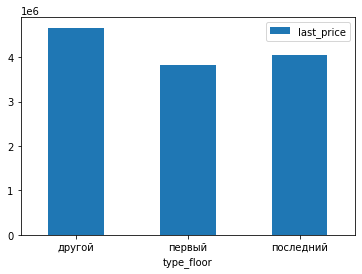

In [116]:
data.pivot_table(index='type_floor', values='last_price').plot(kind='bar')
plt.xticks(rotation = 0)
plt.show()

The average price of an apartment on the outermost floors (first or last) is generally lower than the price of apartments on other floors.

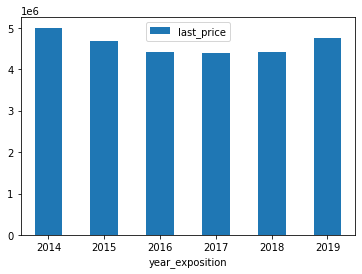

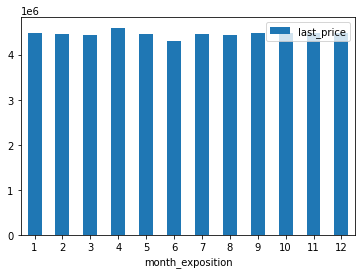

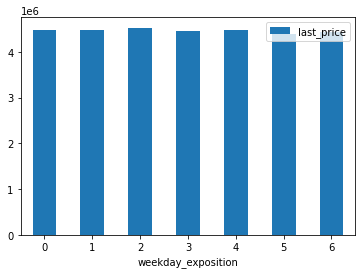

In [117]:
data.pivot_table(index=['year_exposition'], values='last_price').plot(kind='bar')
plt.xticks(rotation = 0)
plt.show()

data.pivot_table(index=['month_exposition'], values='last_price').plot(kind='bar')
plt.xticks(rotation = 0)
plt.show()

data.pivot_table(index=['weekday_exposition'], values='last_price').plot(kind='bar')
plt.xticks(rotation = 0)
plt.show()

But the time of placement does not particularly affect the price of the apartment: the average price values fluctuate at approximately the same level regardless of the month or day of the week. In terms of years, we can observe a decline in apartment prices by 2017, where the minimum was reached, and the beginning of growth in the following years. However, the matter here may be not only the state of the real estate market at that time, but also the decline in the area of sold apartments.

Let's consider the dynamics of the area of sold apartments by year:

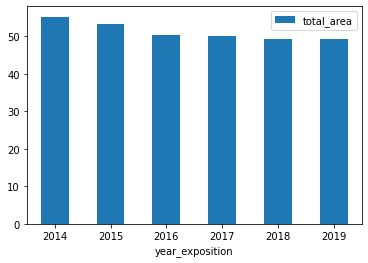

In [118]:
data.pivot_table(index=['year_exposition'], values='total_area').plot(kind='bar')
plt.xticks(rotation = 0)
plt.show()

The hypothesis was confirmed: since 2014, there has been a gradual decline in the total area of apartments for sale. Apartments became smaller, so the price for them decreased. However, in 2019, compared to 2018, the area of apartments remained approximately at the same level, but the price increased quite a lot. This observation can already be attributed to some changes in the economic state of the market.

**Conclusion:** 

Thus, the cost of the apartment is most strongly influenced by the parameters affecting the area of the apartment (both total and living and kitchen area), the price per 1 sq.m. and the number of rooms. There is a positive correlation for all these parameters: the larger the area, the more rooms and the higher the price per 1 sq.m., the higher the final cost of the apartment. The floor type parameter is also important: as a rule, apartments on the first and last floors are cheaper. There is no seasonal dependence or dependence on the day of the week when the ad was placed. But there may be a dependence on the year of placement. However, first of all, it is explained by the general decrease in the area of apartments for sale, and then by the state of the market at that time.

#### Dependence of price of 1 sq.m. on locality

The 10 localities with the highest number of postings:

In [119]:
locality_table = data.pivot_table(index='locality_name', values='one_m_price', aggfunc=['count', 'mean'])
locality_table.columns = ['count', 'mean_price']
locality_table['mean_price'] = locality_table['mean_price'].round()

# находим ТОП-10
locality_table = locality_table.sort_values('count', ascending=False).head(10)

# сортируем по убыванию цены за 1 кв.м. для удобства
locality_table.sort_values('mean_price', ascending=False)

,count,mean_price
locality_name,,
Санкт-Петербург,11732,104963.0
Пушкин,304,100084.0
Кудрово,440,95451.0
Парголово,321,90497.0
Мурино,567,86418.0
Шушары,418,78919.0
Колпино,296,75865.0
Гатчина,284,68574.0
Всеволожск,360,66813.0


The first place by the number of placed ads and price per sq.m. is occupied by St. Petersburg, which is logical, as it is the largest of the presented settlements. The lowest price per sq.m. is typical for Vyborg.

#### Cost per km in St. Petersburg

Let's create a new column to calculate the average cost of one km from the city center. For convenience, let's transfer all calculations to a new dataframe.

In [120]:
spb_data = data.query('locality_name == "Санкт-Петербург"').copy()
spb_data['one_km_price'] = spb_data['last_price'] / spb_data['cityCenters_nearest_km']
spb_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,locality_type,one_m_price,weekday_exposition,month_exposition,year_exposition,type_floor,cityCenters_nearest_km,one_km_price
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.300000,4,False,...,574.0,558.0,город,92786.0,3,8,2015,другой,14.0,371142.857143
7,5,7915000,71.6,2019-04-18,2,2.65,24,40.713725,22,False,...,4000.0,NaN,город,110545.0,3,4,2019,другой,12.0,659583.333333
9,18,5400000,61.0,2017-02-26,3,2.50,9,43.600000,7,False,...,4000.0,289.0,город,88525.0,6,2,2017,другой,15.0,360000.000000
10,5,5050000,39.6,2017-11-16,1,2.67,12,20.300000,3,False,...,553.0,137.0,город,127525.0,3,11,2017,другой,14.0,360714.285714
15,16,4650000,39.0,2017-11-18,1,2.65,14,20.500000,5,False,...,296.0,19.0,город,119231.0,5,11,2017,другой,14.0,332142.857143


In [121]:
print('Средняя стоимость 1 км от центра города:', spb_data['one_km_price'].mean().round())

Средняя стоимость 1 км от центра города: inf


Previously, a scatter diagram of the object price versus distance to the city center was already constructed, from which a weak negative dependence could be observed. However, all settlements were included there, so it was not easy to interpret the graph unambiguously. Now let us consider only the advertisements placed in St. Petersburg.

Dynamics of the price of one km relative to the distance from the city center:

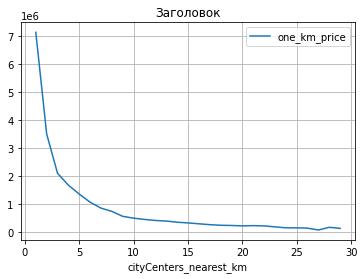

In [130]:
spb_data.pivot_table(index='cityCenters_nearest_km', values='one_km_price').plot(grid = True, title = 'Заголовок')
plt.show()

It is logical that apartments located close to the city center are more expensive. The graph clearly shows this: the closer you get, the faster the price rises.

### Overall conclusion

As part of this project, a study of apartment prices in St. Petersburg and neighboring communities was conducted. The data contained information on more than 20 thousand posted advertisements from 2014 to 2019.
Before the analysis, some problems were identified and mostly corrected in the data: omissions, rare and anomalous values, and inappropriate data types. In the research part, we studied the distributions of the main parameters, considered how fast apartment sales were carried out in the period under consideration, what and how affects the formation of the market value of objects and which settlements in the Leningrad Region are leading in the number of posted ads.

**Main findings**:
- On average, an apartment takes about six months to sell. However, half of the posted apartments find buyers earlier - within 2 months. A sale can be considered long if the ad "hangs" for a year or more.
- The strongest influence on the cost of the apartment are such parameters as the area of the apartment, the price of 1 sq.m., the number of rooms and the floor on which it is located. At the same time, the higher these values are, the higher the price.
- The month and day of the week when the ad was placed does not affect the price of the apartment.
- The decline in apartment prices from 2014 to 2018 is explained by a general decrease in the area of the sold objects, but the rise from 2018 to 2019 may be due to the economic state of the market.
- St. Petersburg leads among other settlements by the number of placed ads and price per 1 sq.m. Here it is approximately 105 thousand rubles
- The distance from the city center also affects the cost of the apartment. The average price per km in St. Petersburg is 548 thousand rubles. And the dependence is inverse: the closer the apartment is to the city center, the faster the price rises.
